In [9]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier

In [10]:
# Read in Data 
filename = "Waves_2023.txt"
file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))
df = (file[['WVHT','APD','DPD','MWD','WTMP']].copy()).dropna()

X = np.column_stack((df['APD'],df['DPD'],df['MWD'],df['WTMP']))
y = df['WVHT'].to_numpy()


/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_88253/981794688.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))


In [11]:
# Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [12]:
# Decision Tree Regressor
from sklearn import tree
clf1 = tree.DecisionTreeRegressor()
clf1.fit(X_train, y_train)
print('Train = ', sk.metrics.mean_squared_error(y_train, clf1.predict(X_train)))

clf2 = tree.DecisionTreeRegressor()
clf2.fit(X_train, y_train)
print ('Val = ', sk.metrics.mean_squared_error(y_val, clf2.predict(X_val)))

clf3 = tree.DecisionTreeRegressor()
clf3.fit(X_train, y_train)
print ('Test = ', sk.metrics.mean_squared_error(y_test, clf3.predict(X_test)))

print('Decision Tree Regression Mean square error (MSE) = ', sk.metrics.mean_squared_error(y_test, clf3.predict(X_test)))


Train =  1.1185035194291775e-05
Val =  0.14780591553369973
Test =  0.15477625108475557
Decision Tree Regression Mean square error (MSE) =  0.15477625108475557


In [13]:
# Forest Regressor w/ 25 trees
from sklearn.ensemble import RandomForestRegressor
clf4 = RandomForestRegressor(n_estimators= 25)
clf4.fit(X_train,y_train)
print('Train = ', sk.metrics.mean_squared_error(y_train, clf4.predict(X_train)))

clf5 = RandomForestRegressor(n_estimators= 25)
clf5.fit(X_train, y_train)
print ('Val = ', sk.metrics.mean_squared_error(y_val, clf5.predict(X_val)))

clf6 = RandomForestRegressor(n_estimators= 25)
clf6.fit(X_train, y_train)
print ('Test = ', sk.metrics.mean_squared_error(y_test, clf6.predict(X_test)))

print('Forest Regression w/ 25 trees MSE = ', sk.metrics.mean_squared_error(y_test, clf6.predict(X_test)))


Train =  0.012958547866490963
Val =  0.08477654826952077
Test =  0.0860741117015524
Forest Regression w/ 25 trees MSE =  0.0860741117015524


In [41]:
# Linear Regression
reg1 = linear_model.LinearRegression()
reg1.fit(X_train,y_train)
print('Train = ', sk.metrics.mean_squared_error(y_train, reg1.predict(X_train)))

reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
print('Val = ', sk.metrics.mean_squared_error(y_val, reg2.predict(X_val)))

reg3 = linear_model.LinearRegression()
reg3.fit(X_train,y_train)
print('Test = ', sk.metrics.mean_squared_error(y_test, reg3.predict(X_test)))

print('Linear Regression MSE = ', sk.metrics.mean_squared_error(y_test, reg3.predict(X_test)))



Train =  1.7565076284590353
Val =  1.1240085966931206
Test =  2.6679520019956744
Linear Regression MSE =  2.6679520019956744


In [16]:
# 1) The Forest regressor with 25 trees is the best model for this data set, however the decision tree regressor has a better fit to the training data.

# 2) The cost function for the decisoin tree regressor and the forest regressor is sum of squared error. The cost functin of a linear regression is also sum of squared error.

# 3) No hyperparameters were tuned for the decision tree regressor or linear regressor but the number of trees for the random forest regressor was set to be 25. 

# 4) If you redo the analysis with a different random seed, the results will change slightly

In [63]:
# Random Forest
train = []
val = []
line = []
trees = [2, 10, 25, 50, 100, 250, 500, 1000]
# trees=[1000]

for i in np.arange(0,len(trees)):
    tree = trees[i]
    clf = RandomForestRegressor(n_estimators= tree)
    clf.fit(X_train,y_train)
    l = clf.predict(X_train)
    line.append(l)
    t = sk.metrics.mean_squared_error(y_train, l)
    train.append(t)
    v = sk.metrics.mean_squared_error(y_val, clf.predict(X_val))
    val.append(v)




[Text(0.5, 0, 'Trees'), Text(0, 0.5, 'Mean Square Error')]

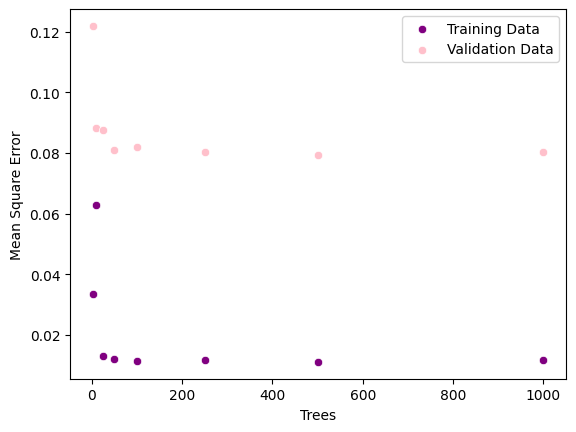

In [18]:
# Scatter Plot
sPlot = sns.scatterplot(x = trees, y = train, color = 'purple', label = 'Training Data')
sPlot = sns.scatterplot(x = trees, y = val, color = 'pink', label = 'Validation Data')
sPlot.legend()
sPlot.set(xlabel='Trees', ylabel = 'Mean Square Error')

In [72]:

# 5) There is a large difference between the training and validation data. The training data has a much lower mean square error than the validation data. This is evidence of overfitting.